# Visualizing crime trends in St. Louis city

This notebook illustrates various patterns for crimes reported in St. Louis, MO between the years 2008-2016.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
%matplotlib notebook

## Dataframe manipulation

We first load the crime data (cleaned using the `stl_crime_cleaning.ipynb` notebook, and manipulate it to streamline the visualizations. 

In [37]:
crimedf = pd.read_pickle('cleaned_data/crimedf.pkl')

# dictionary to convert neighbhorhoods to/from numbers
hooddict = {'Carondelet': 1, 'Patch': 2, 'Holly Hills': 3, 'Boulevard Heights': 4, 'Bevo Mill': 5, 'Princeton Heights': 6, 'South Hampton': 7, 'St. Louis Hills': 8, 'Lindenwood Park': 9, 'Ellendale': 10, 'Clifton Heights': 11, 'The Hill': 12, 'Southwest Garden': 13, 'North Hampton': 14, 'Tower Grove South': 15, 'Dutchtown': 16, 'Mount Pleasant': 17, 'Marine Villa': 18, 'Gravois Park': 19, 'Kosciusko': 20, 'Soulard': 21, 'Benton Park': 22, 'McKinley Heights': 23, 'Fox Park': 24, 'Tower Grove East': 25, 'Compton Heights': 26, 'Shaw': 27, 'Botanical Heights (formerly McRee Town)': 28, 'Tiffany': 29, 'Benton Park West': 30, 'The Gate District': 31, 'Lafayette Square': 32, 'Peabody, Darst, Webbe': 33, 'La Salle': 34, 'Downtown': 35, 'Downtown West': 36, 'Midtown': 37, 'Central West End': 38, 'Forest Park Southeast': 39, 'Kings Oak': 40, 'Cheltenham': 41, 'Clayton-Tamm': 42, 'Franz Park': 43, 'Hi-Pointe': 44, 'Wydown-Skinker': 45, 'Skinker-DeBaliviere': 46, 'DeBaliviere Place': 47, 'West End': 48, 'Visitation Park': 49, 'Wells-Goodfellow': 50, 'Academy': 51, 'Kingsway West': 52, 'Fountain Park': 53, 'Lewis Place': 54, 'Kingsway East': 55, 'The Greater Ville': 56, 'The Ville': 57, 'Vandeventer': 58, 'JeffVanderLou': 59, 'St. Louis Place': 60, 'Carr Square': 61, 'Columbus Square': 62, 'Old North St. Louis': 63, 'Near North Riverfront': 64, 'Hyde Park': 65, 'College Hill': 66, 'Fairground Neighborhood': 67, "O'Fallon": 68, 'Penrose': 69, 'Mark Twain-I-70 Industrial': 70, 'Mark Twain': 71, 'Walnut Park East': 72, 'North Point': 73, 'Baden': 74, 'Riverview': 75, 'Walnut Park West': 76, 'Covenant Blu-Grand Center': 77, 'Hamilton Heights': 78, 'North Riverfront': 79, 'Carondelet Park': 80, 'Tower Grove Park': 81, 'Forest Park': 82, 'Fairgrounds Park': 83, 'Penrose Park': 84, 'Calvary-Bellefontaine Cemetaries': 86}
inv_hooddict = {v: k for k, v in hooddict.items()}

hoodpopdf = pd.read_pickle('cleaned_data/hoodpopdf.pkl')
hoodpopdf['Name'] = hoodpopdf['Neighborhood'].replace(inv_hooddict)
hoodpopdict = hoodpopdf.set_index('Name')['Neighborhood']
hoodpopdf = hoodpopdf[~(hoodpopdf['Name']=="O'Fallon Park")]

crimedf['Hour']=crimedf['Date'].dt.hour.astype(float)
crimedf['Minute']=crimedf['Date'].dt.minute.astype(float)
crimedf['time_of_day'] = crimedf['Hour'].astype(float) + crimedf['Minute'].astype(float)/60
crimedf['day_of_year'] = crimedf['Date'].dt.dayofyear.astype(float)
crimedf['time_of_day'] = crimedf['time_of_day']-7
crimedf.loc[crimedf['time_of_day']<0,'time_of_day'] = crimedf.loc[crimedf['time_of_day']<0,'time_of_day'] + 24

crimedf['Robbery'] = 0
crimedf.loc[crimedf['Crime'].str[0:2] == '03', 'Robbery'] = 1
crimedfrobbery = crimedf[(crimedf['Robbery']==1)]
crimedfrobbery = crimedfrobbery.reset_index().drop(['index'],1)

crimedf['Hwyrob'] = 0
crimedf.loc[crimedf['Crime'].str[0:3] == '031', 'Hwyrob'] = 1
crimedfhwyrob = crimedf[(crimedf['Hwyrob']==1)]
crimedfhwyrob = crimedfhwyrob.reset_index().drop(['index'],1)

## Most common times of day/year for robberies

The plot below demonstrates a strong relationship between the frequency of robberies and the time of day/year.  In fact, most robberies occur in the hours following sunset.  

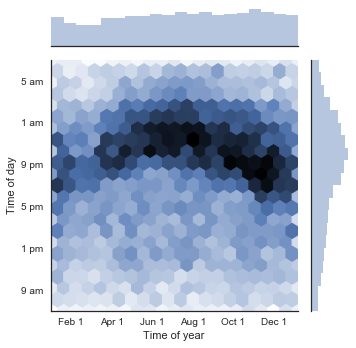

In [35]:
sbp = sns.jointplot(crimedfrobbery.day_of_year, crimedfrobbery.time_of_day, kind='hex', size=5, stat_func=None, space=1/3, gridsize=20, marginal_kws={"bins": 20});
sbp.set_axis_labels('Time of year', 'Time of day')
sbp.ax_joint.set_yticks([2, 6, 10, 14, 18, 22])
sbp.ax_joint.set_xticks([30, 90, 150, 210, 270, 330])
sbp.ax_joint.set_yticklabels(['9 am','1 pm','5 pm','9 pm','1 am','5 am'])
sbp.ax_joint.set_xticklabels(['Feb 1','Apr 1','Jun 1','Aug 1','Oct 1','Dec 1'])
sbp.ax_joint.set_xlim([0, 365])
sbp.ax_joint.set_ylim([0, 24])
sns.set(style="white", color_codes=True)
sbp.savefig("robbery_tod_vs_toy.pdf", bbox_inches='tight')